**2.** Возьмите свой набор данных (или выберите, например, на kaggle). Выполните различные возможные операции по предобработке и первичному анализу данных.

"Date": Дата, когда были зафиксированы указанные цены акций.
"Open": Цена открытия акций в этот день.
"High": Наивысшая цена акций, достигнутая в течение дня.
"Low": Наименьшая цена акций, достигнутая в течение дня.
"Close": Цена закрытия акций в конце торгового дня.
"Adj Close": Скорректированная цена закрытия, учитывающая различные корректировки, такие как выплаты дивидендов.
"Volume": Объем акций, торгованных в течение дня.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
amazon_df = pd.read_csv('Amazon.csv')

In [4]:
print(f"Первые пять записей:\n{amazon_df.head()}")
print(f"Последние пять записей:\n{amazon_df.tail()}")

Первые пять записей:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
Последние пять записей:
            Date        Open         High          Low        Close  \
6150  2021-10-21  3414.25000  3440.280029  3403.000000  3435.010010   
6151  2021-10-22  3421.00000  3429.840088  3331.300049  3335.550049   
6152  2021-10-25  3335.00000  3347.800049  3297.699951  3320.370117   
6153  2021-10-26  3349.51001  3416.120117  3343.979980  3376.070068   
6154  2021-10-27  3388.00000  3412.000000  3371.453369  3396.189941   

        Adj Close   Volume  
6150  3435.010010  1881400  
6151  3335.550049  3

In [33]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6155 non-null   object 
 1   Open               6155 non-null   float64
 2   High               6155 non-null   float64
 3   Low                6155 non-null   float64
 4   Close              6155 non-null   float64
 5   Adj Close          6155 non-null   float64
 6   Volume             6155 non-null   int64  
 7   Market Cap         6155 non-null   float64
 8   vol                6154 non-null   float64
 9   Cumulative Return  6154 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 481.0+ KB


In [6]:
amazon_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [7]:
print(len(amazon_df) - len(amazon_df.dropna()))


0


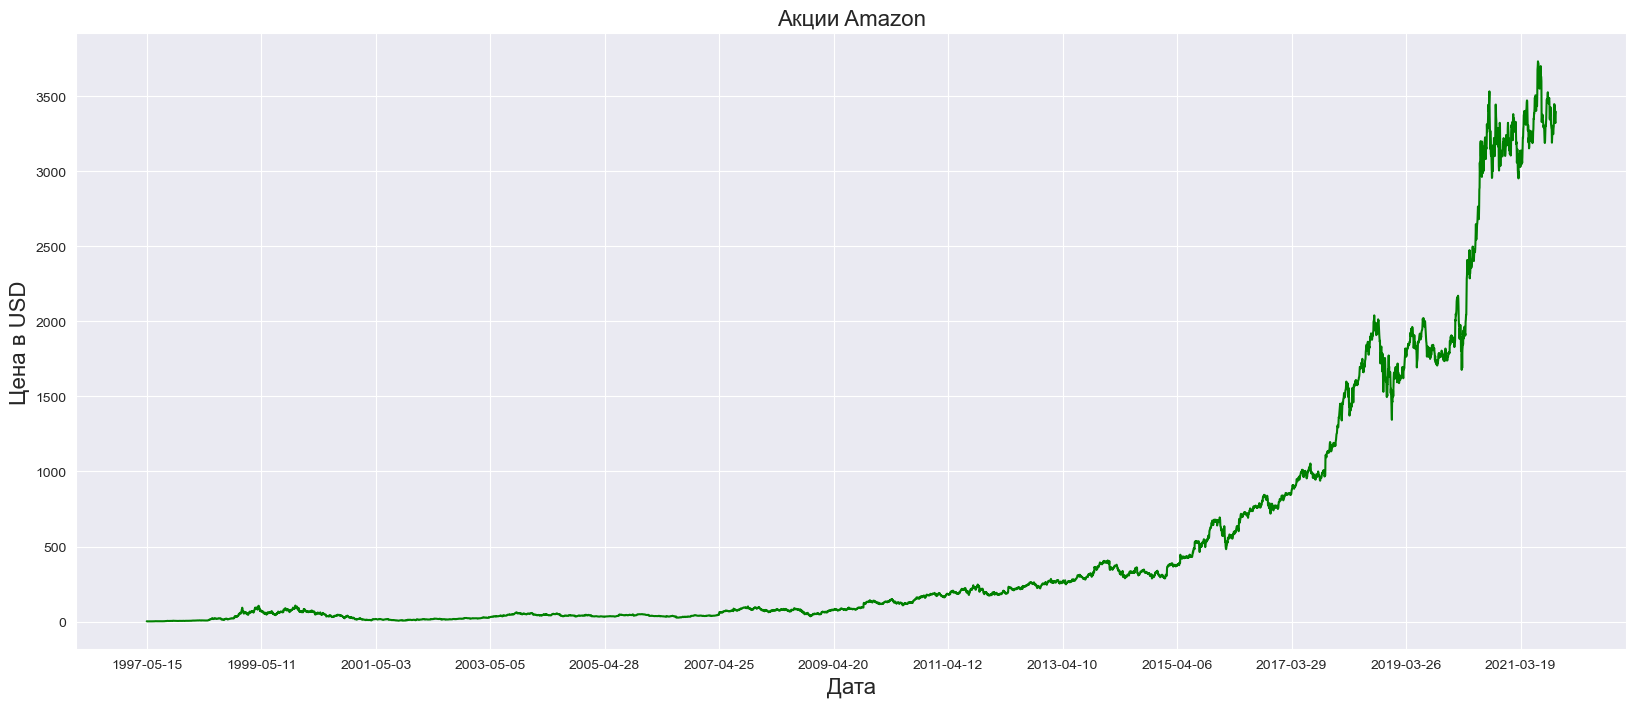

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(amazon_df['Date'], amazon_df['Close'], color='Green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Дата', fontsize='16')
ax.set_ylabel('Цена в USD', fontsize='16')
plt.title('Акции Amazon', fontsize='16')
#plt.grid()
plt.show()

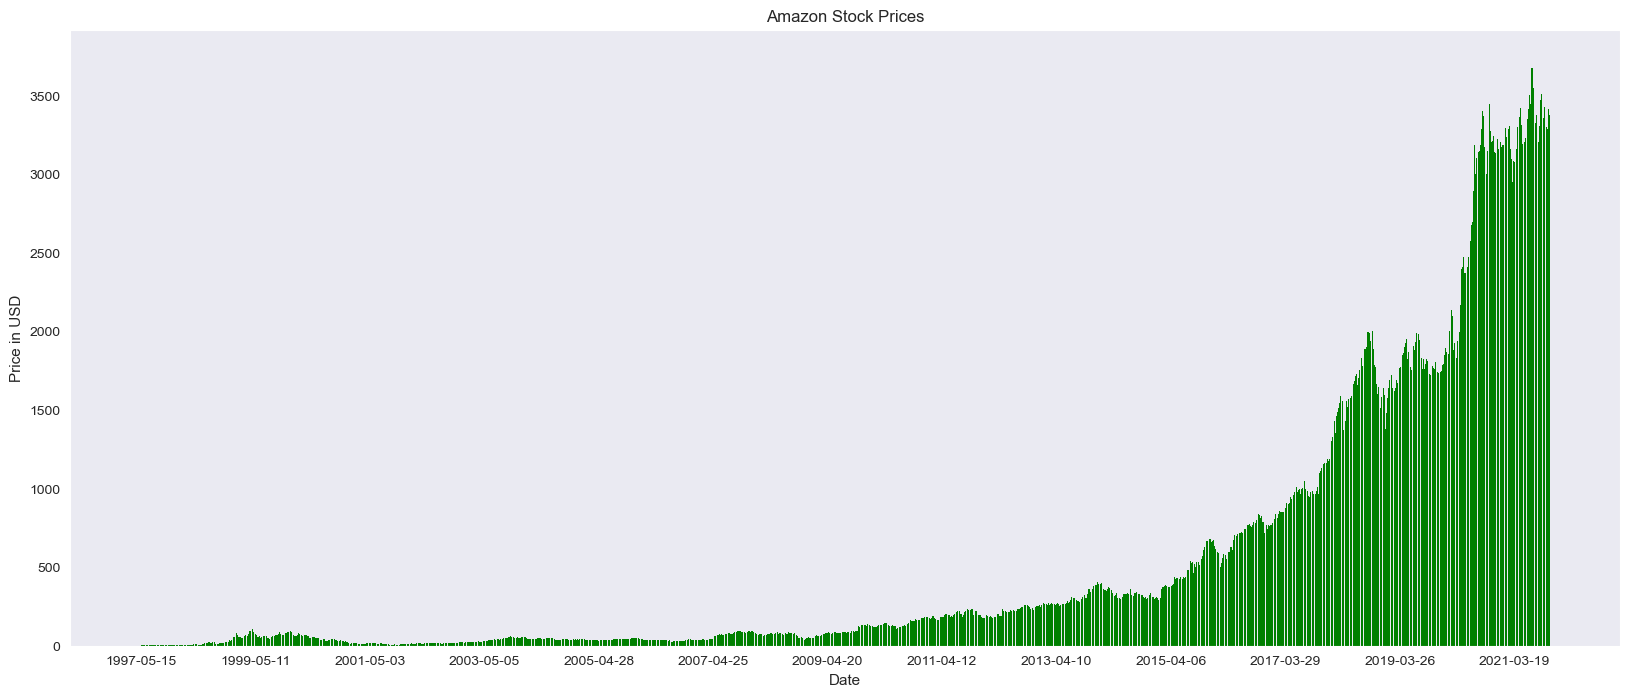

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(amazon_df['Date'], amazon_df['Close'], color='Green', edgecolor='none')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

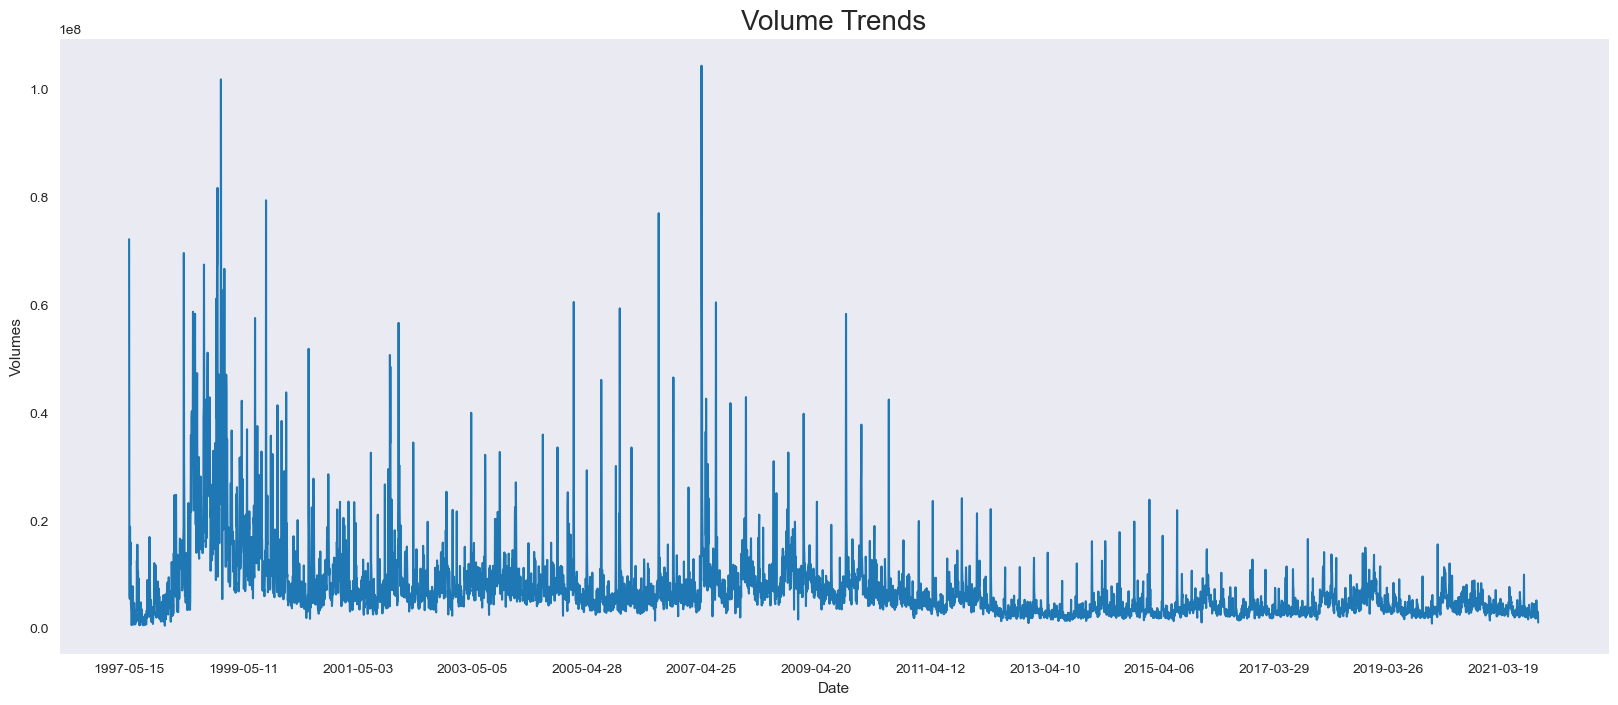

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(amazon_df['Date'], amazon_df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

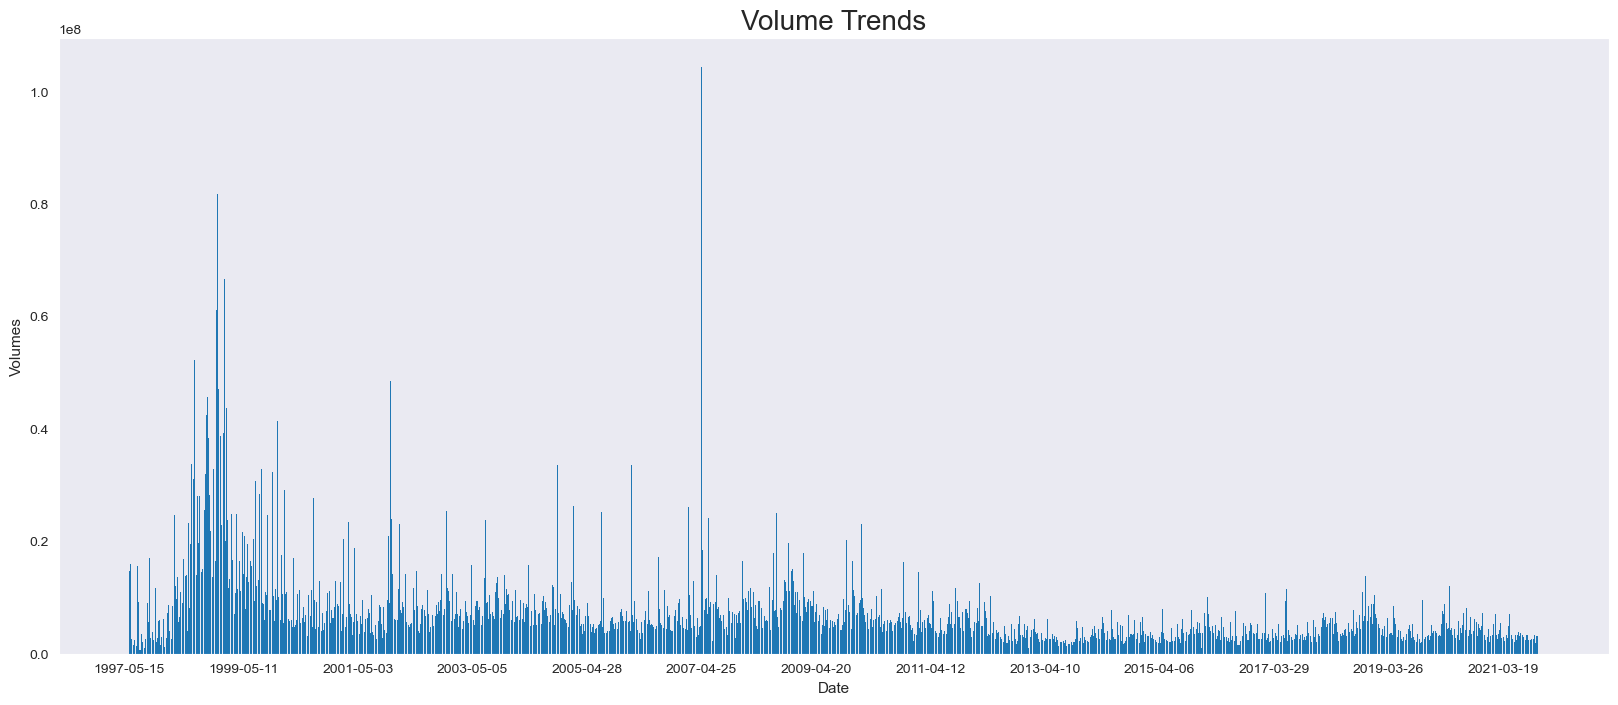

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(amazon_df['Date'], amazon_df['Volume'], edgecolor='none')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [12]:
amazon_df['Market Cap'] = amazon_df['Open'] * amazon_df['Volume']

In [13]:
amazon_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Market Cap'],
      dtype='object')

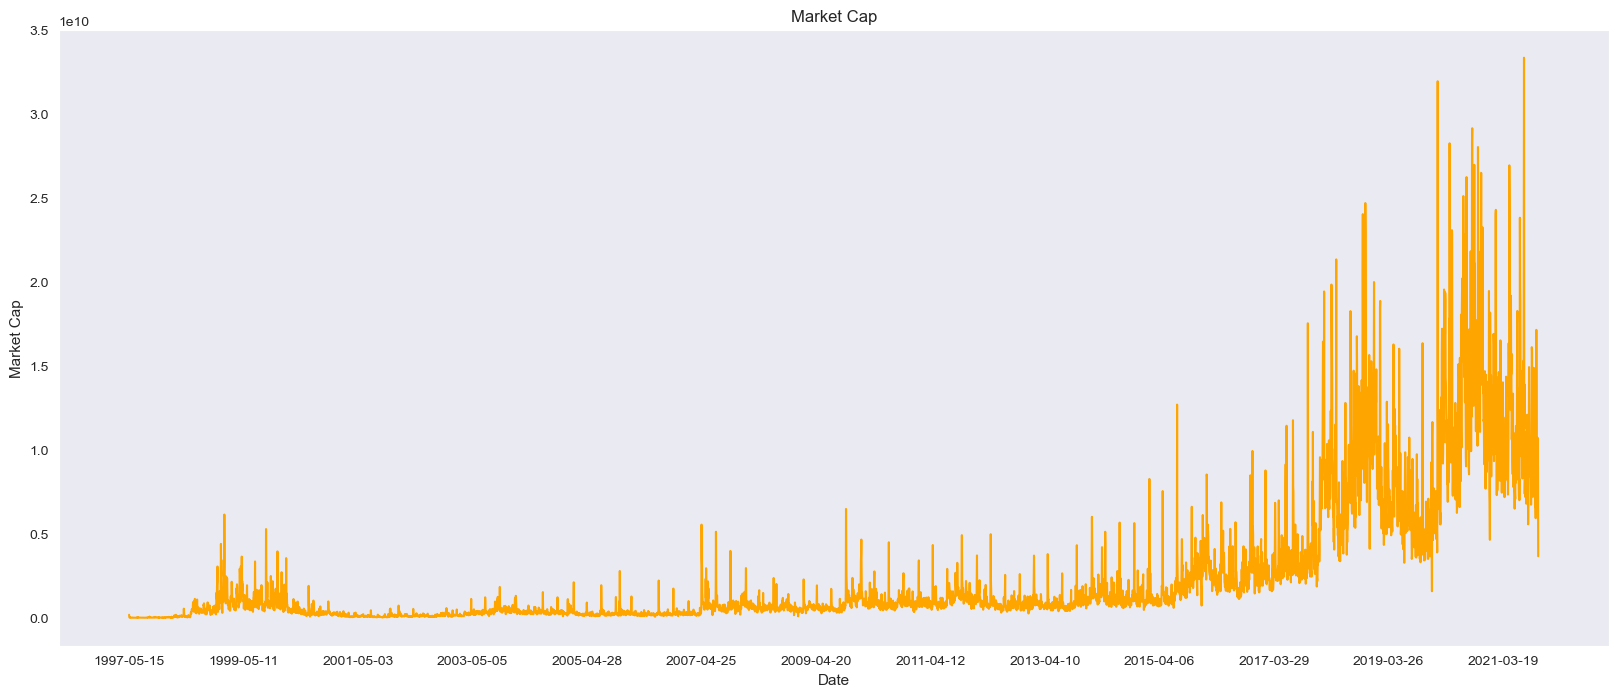

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_df['Date'], amazon_df['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

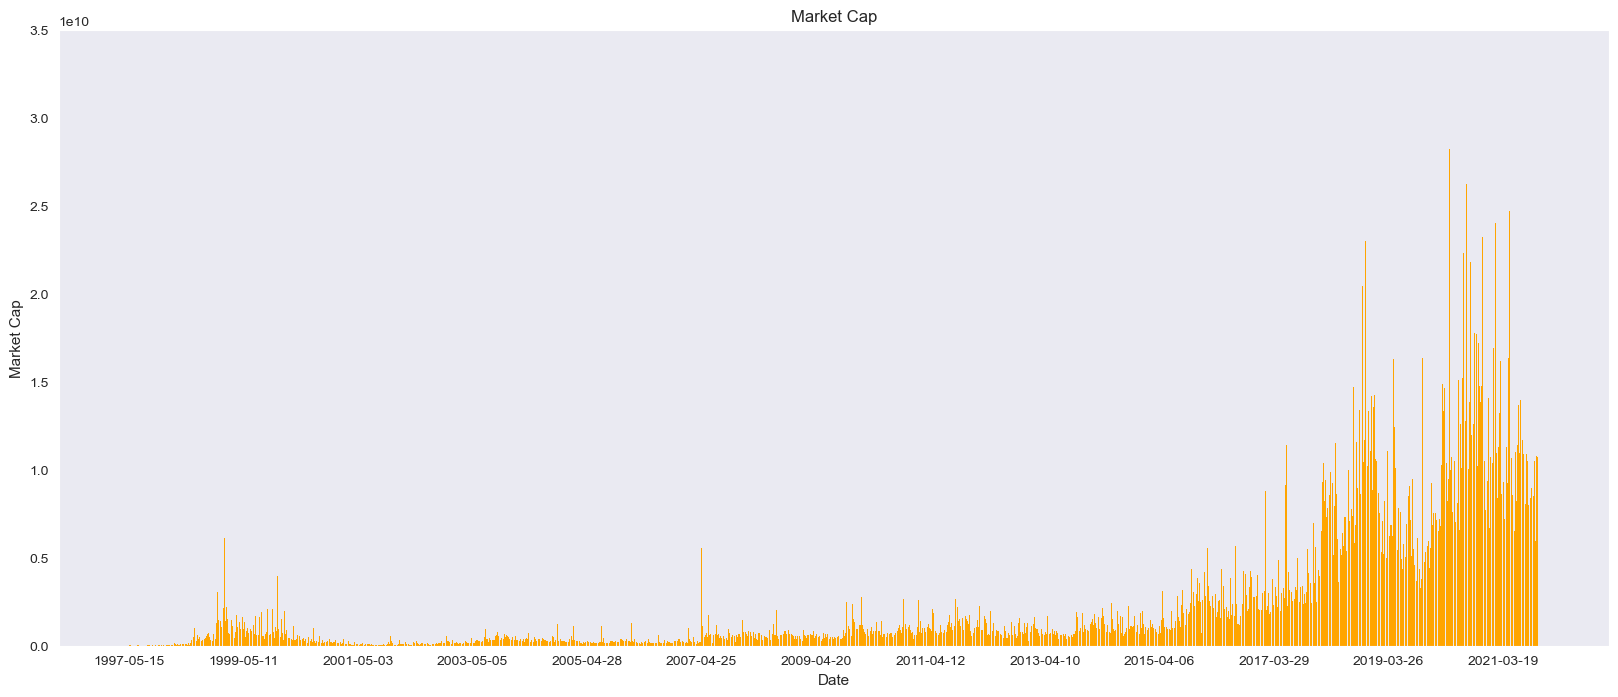

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_df['Date'], amazon_df['Market Cap'], color='orange', edgecolor='none')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [16]:
amazon_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Market Cap
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06,2.344079e+09
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06,3.941011e+09
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05,8.935627e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06,2.879908e+08
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06,7.382087e+08
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06,2.117410e+09
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08,3.333587e+10


In [17]:
amazon_df.iloc[amazon_df['Market Cap'].argmax()]


Date                2021-07-30
Open               3347.949951
High               3368.139893
Low                 3306.97998
Close              3327.590088
Adj Close          3327.590088
Volume                 9957100
Market Cap    33335872457.1021
Name: 6092, dtype: object

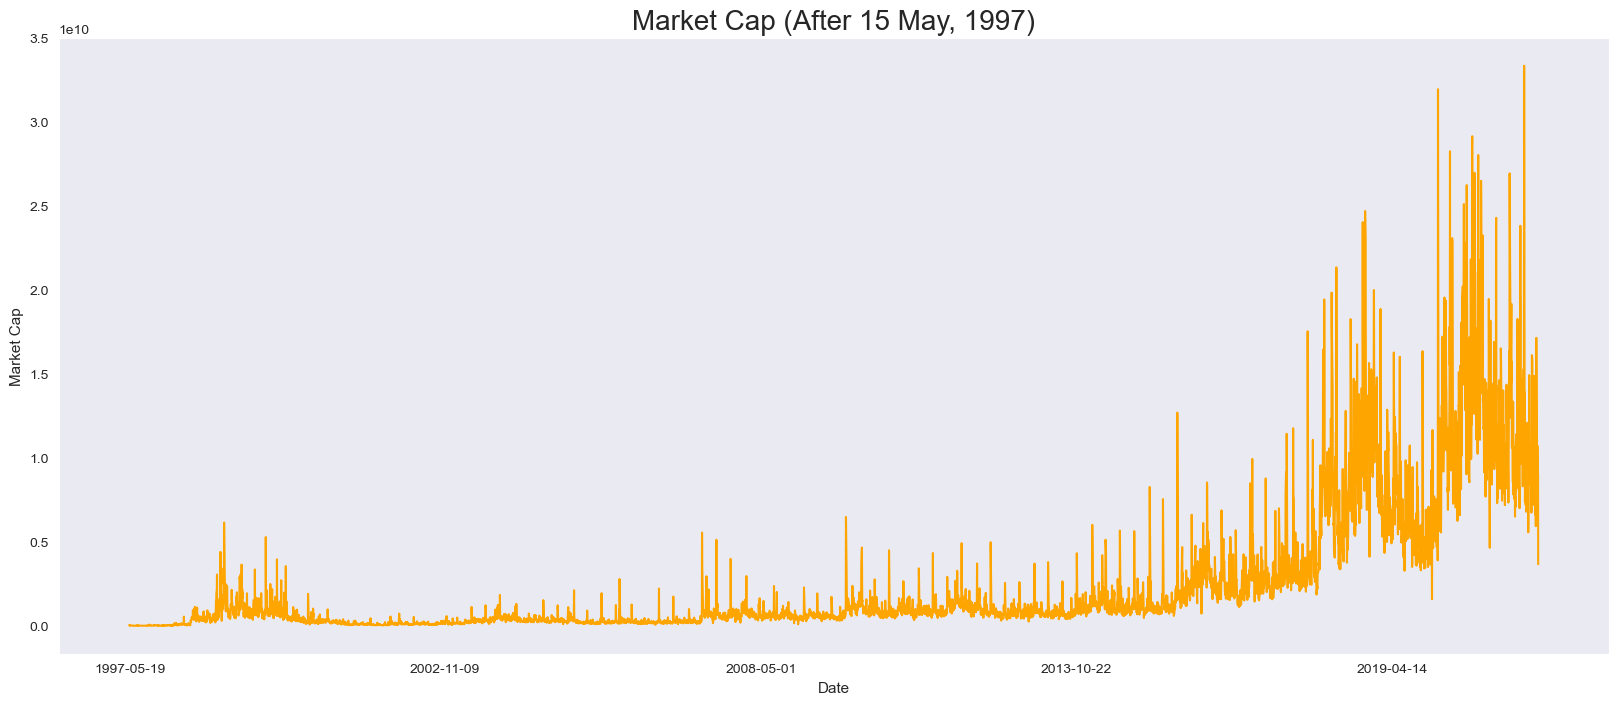

In [18]:
ohlc = amazon_df[(amazon_df['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                     'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 15 May, 1997)', fontsize='20')
plt.show()

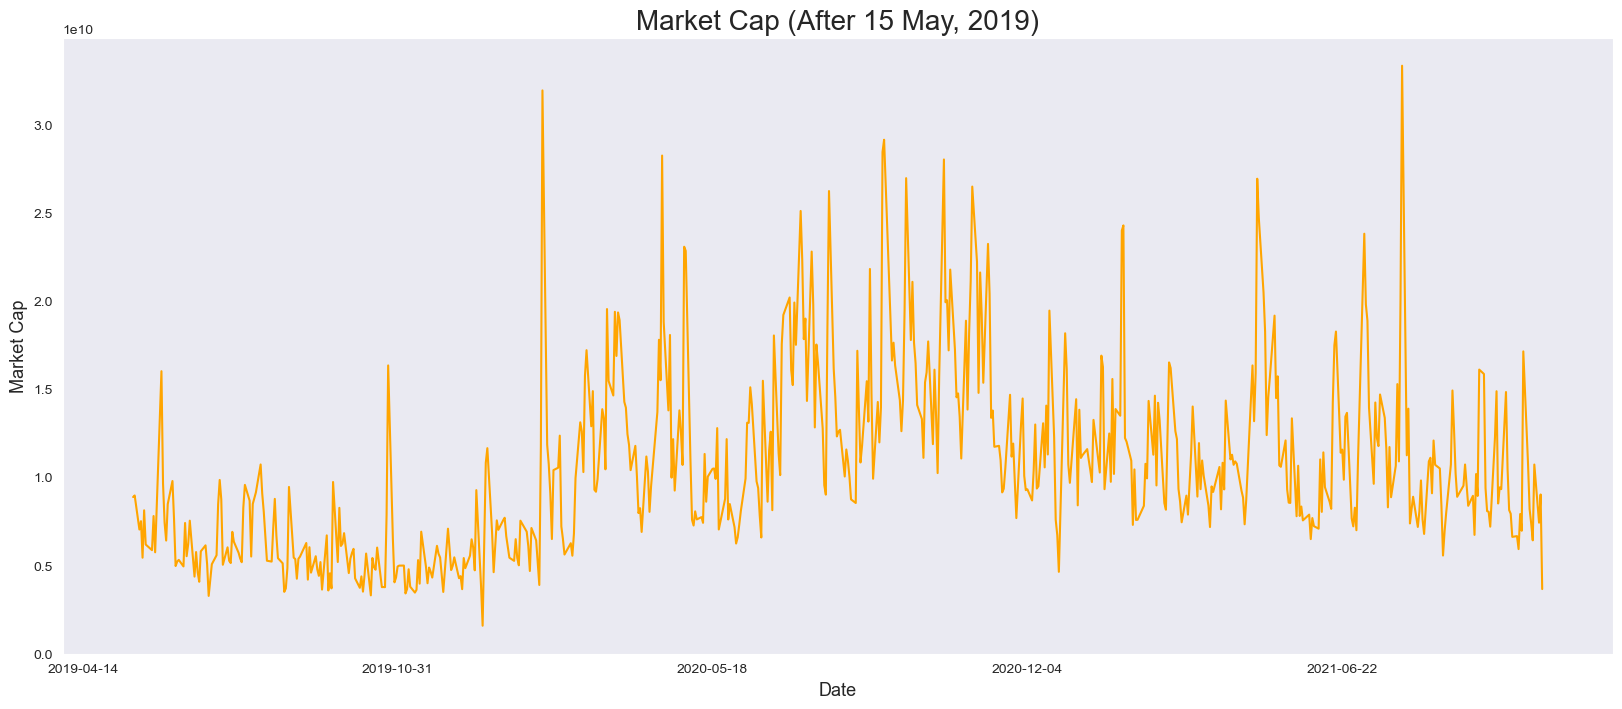

In [19]:
ohlc = amazon_df[(amazon_df['Date'] > '2019-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                     'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='13')
ax.set_ylabel('Market Cap', fontsize='13')
plt.grid()
plt.title('Market Cap (After 15 May, 2019)', fontsize='20')
plt.show()

In [20]:
amazon_df['vol'] = (amazon_df['Close']/amazon_df['Close'].shift(1)) - 1

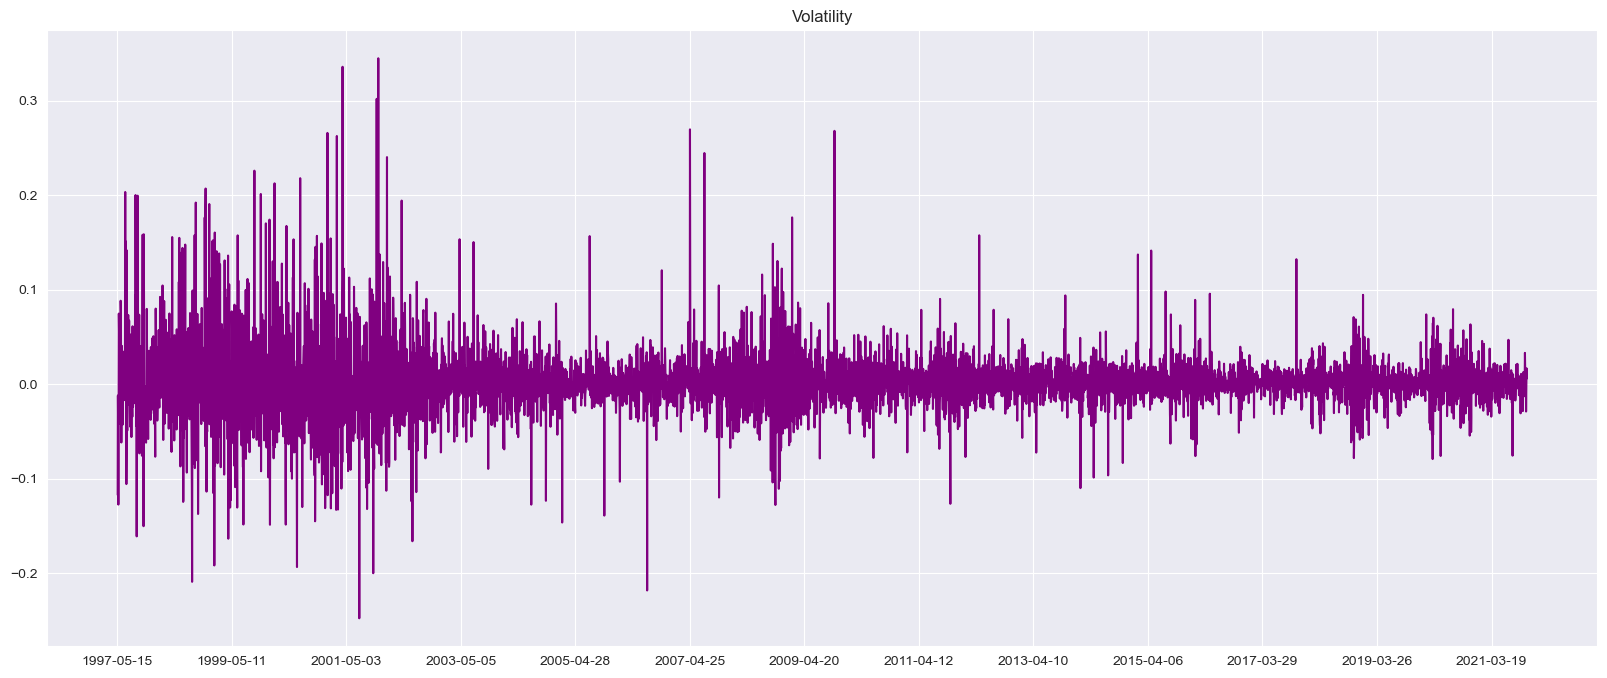

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_df['Date'], amazon_df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
#plt.grid()
plt.show()

# Чем больше волатильность, тем значительнее и чаще происходят изменения цен, чем ниже волатильность, тем меньше цена активов или стабильность цен

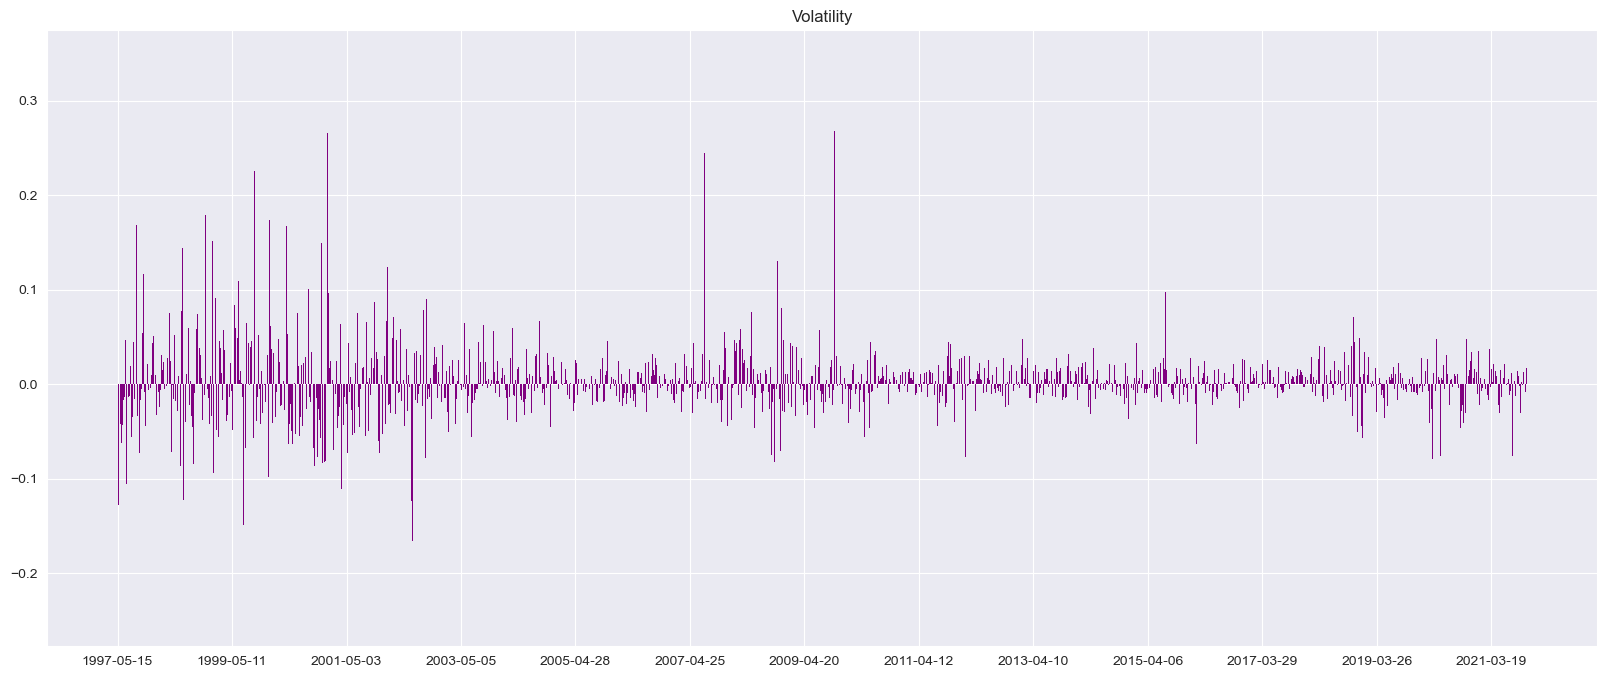

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_df['Date'], amazon_df['vol'], color='purple', edgecolor='none')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
#plt.grid()
plt.show()

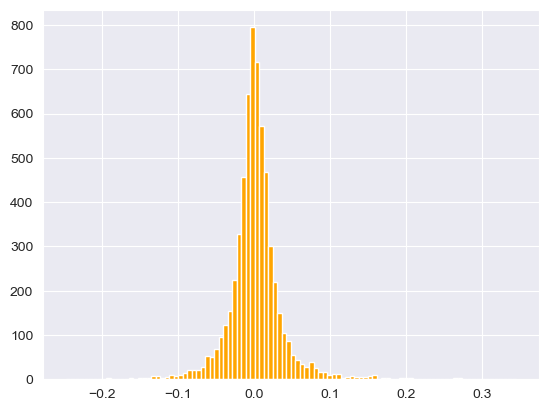

In [23]:
amazon_df['vol'].hist(bins=100, color='orange');

In [24]:
amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,vol
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.758802e+08,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,2.894062e+07,-0.117021
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.075051e+07,-0.012049
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,9.453702e+06,-0.042683
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,3.083284e+07,-0.127389
...,...,...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400,6.423570e+09,0.005842
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800,1.072073e+10,-0.028955
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000,7.423710e+09,-0.004551
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700,9.022575e+09,0.016775


In [25]:
amazon_df['Cumulative Return'] = (1 + amazon_df['vol']).cumprod()

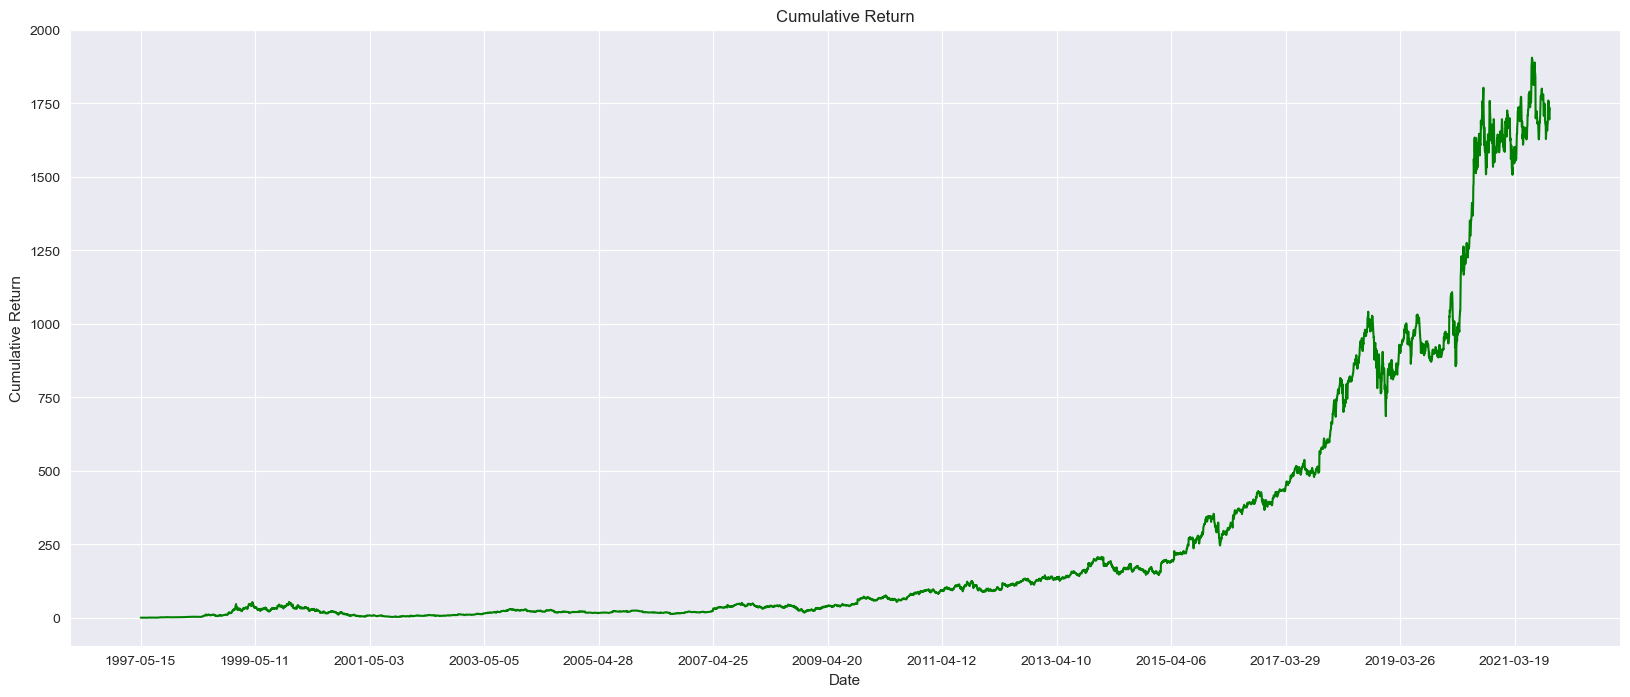

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_df['Date'], amazon_df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
#plt.grid()
plt.show()

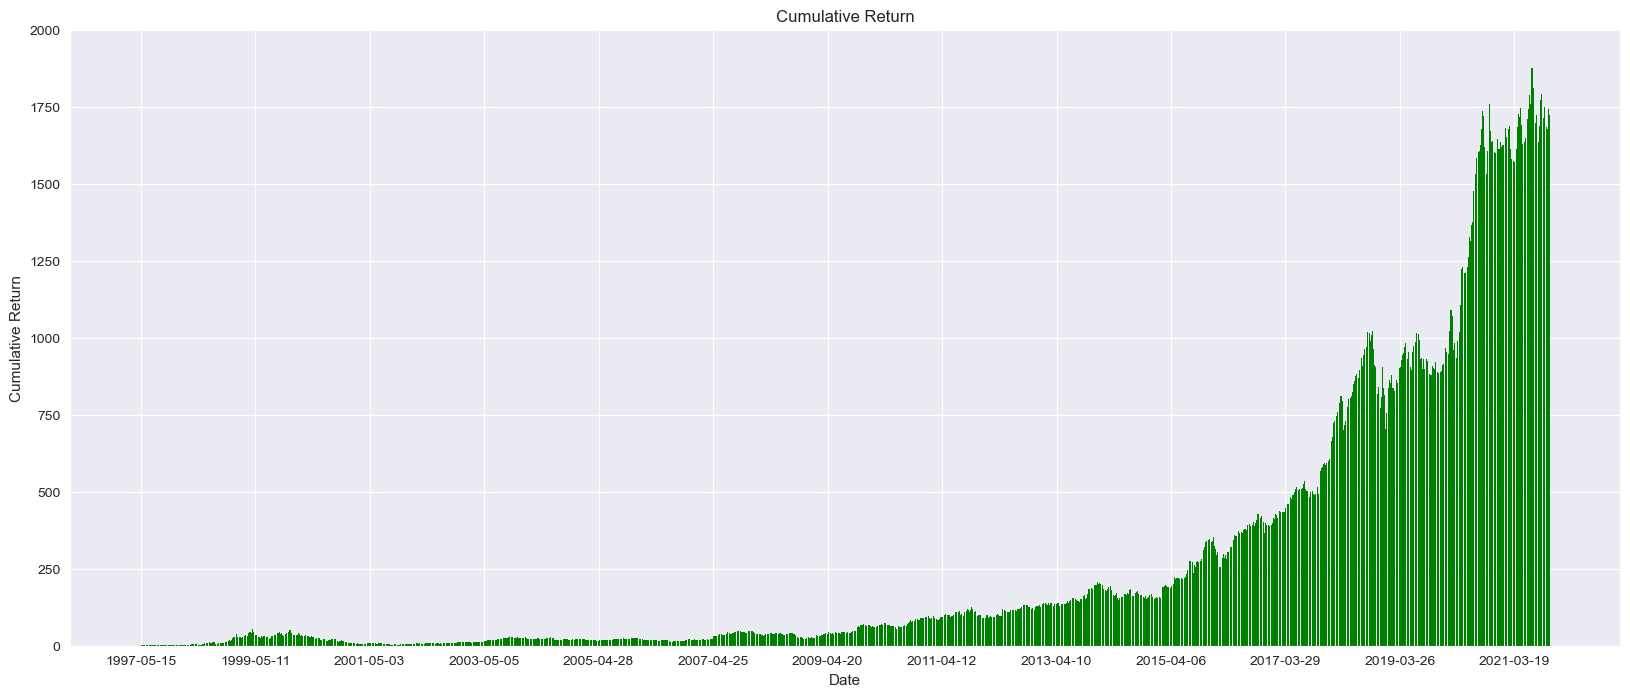

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_df['Date'], amazon_df['Cumulative Return'], color='green', edgecolor='none')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
#plt.grid()
plt.show()

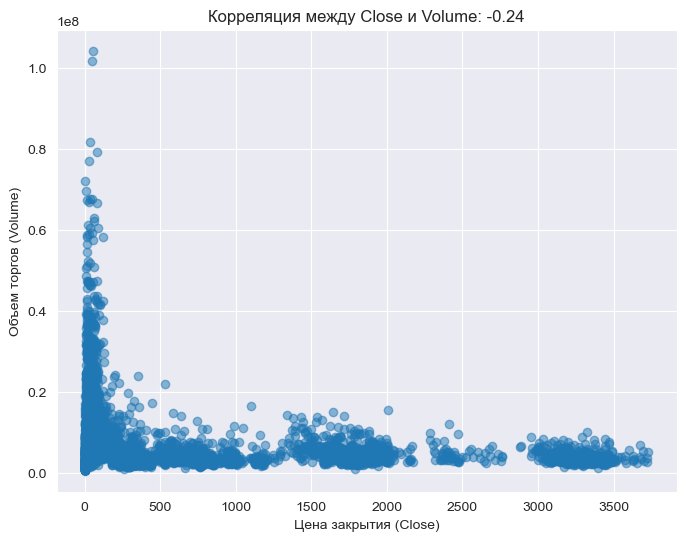

In [28]:
# Рассчитайте корреляцию между ценой закрытия (Close) и объемом торгов (Volume)
correlation = amazon_df['Close'].corr(amazon_df['Volume'])

# Создайте график, показывающий корреляцию
plt.figure(figsize=(8, 6))
plt.scatter(amazon_df['Close'], amazon_df['Volume'], alpha=0.5)
plt.title(f'Корреляция между Close и Volume: {correlation:.2f}')
plt.xlabel('Цена закрытия (Close)')
plt.ylabel('Объем торгов (Volume)')
plt.grid(True)

# Покажите график
plt.show()

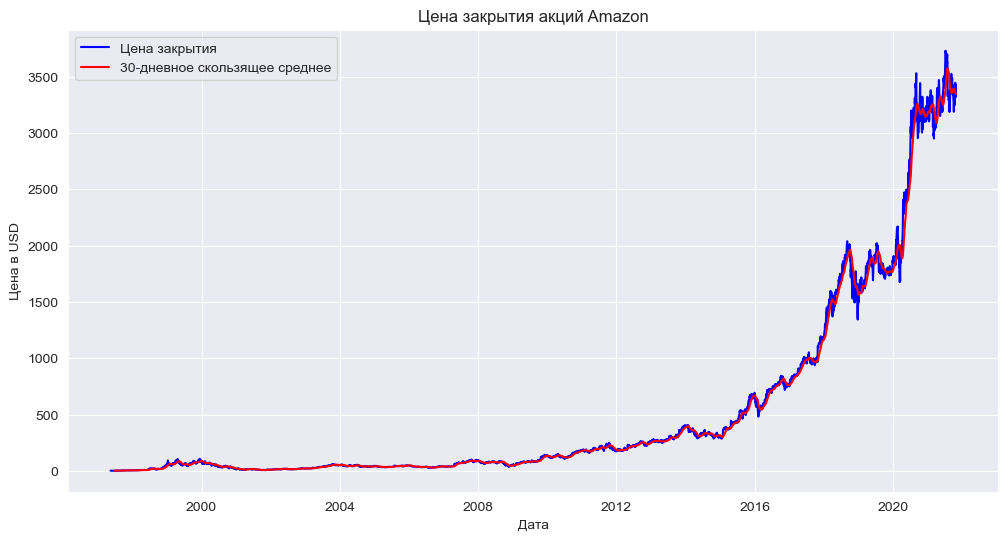

In [29]:

amazon_df_date_form = amazon_df.copy()

# Преобразуйте столбец 'Date' в формат даты (если он еще не в таком формате)
amazon_df_date_form['Date'] = pd.to_datetime(amazon_df['Date'])

# Установите столбец 'Date' в качестве индекса
amazon_df_date_form.set_index('Date', inplace=True)

# Постройте график цены закрытия
plt.figure(figsize=(12, 6))
plt.plot(amazon_df_date_form.index, amazon_df_date_form['Close'], label='Цена закрытия', color='blue')
plt.title('Цена закрытия акций Amazon')
plt.xlabel('Дата')
plt.ylabel('Цена в USD')

# Примените скользящее среднее (rolling mean) для сглаживания данных
rolling_mean = amazon_df_date_form['Close'].rolling(window=30).mean()  # 30-дневное скользящее среднее
plt.plot(amazon_df_date_form.index, rolling_mean, label='30-дневное скользящее среднее', color='red')

# Добавьте легенду
plt.legend()

# Покажите график
plt.show()

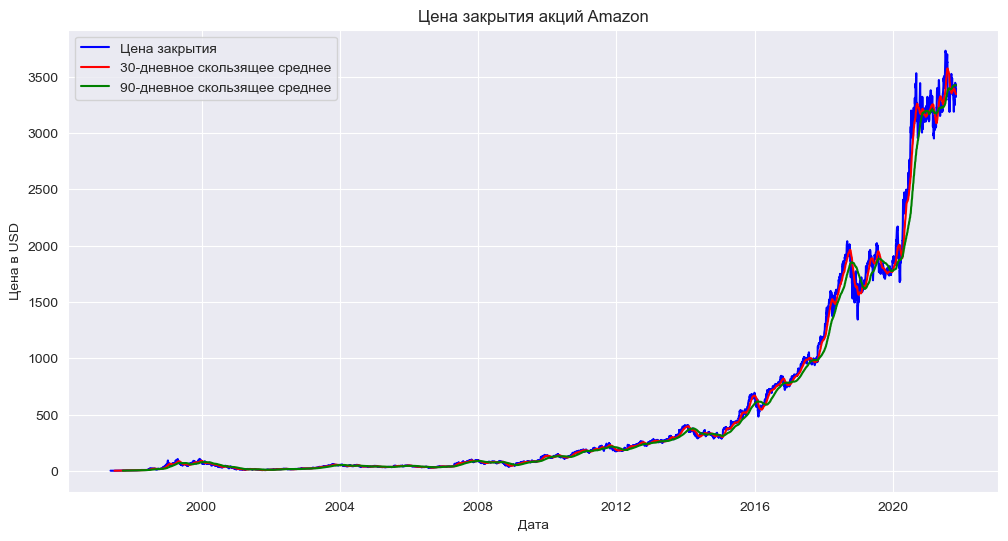

In [30]:
# Постройте график цены закрытия
plt.figure(figsize=(12, 6))
plt.plot(amazon_df_date_form.index, amazon_df_date_form['Close'], label='Цена закрытия', color='blue')
plt.title('Цена закрытия акций Amazon')
plt.xlabel('Дата')
plt.ylabel('Цена в USD')

# Примените скользящее среднее для разных периодов
short_rolling_mean = amazon_df_date_form['Close'].rolling(window=30).mean()  # 30-дневное скользящее среднее
long_rolling_mean = amazon_df_date_form['Close'].rolling(window=90).mean()  # 90-дневное скользящее среднее

# Постройте графики скользящего среднего
plt.plot(amazon_df_date_form.index, short_rolling_mean, label='30-дневное скользящее среднее', color='red')
plt.plot(amazon_df_date_form.index, long_rolling_mean, label='90-дневное скользящее среднее', color='green')

# Добавьте легенду
plt.legend()

# Покажите график
plt.show()

In [31]:
amazon_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,vol,Cumulative Return
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.758802e+08,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,2.894062e+07,-0.117021,0.882979
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.075051e+07,-0.012049,0.872340
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,9.453702e+06,-0.042683,0.835107
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,3.083284e+07,-0.127389,0.728723


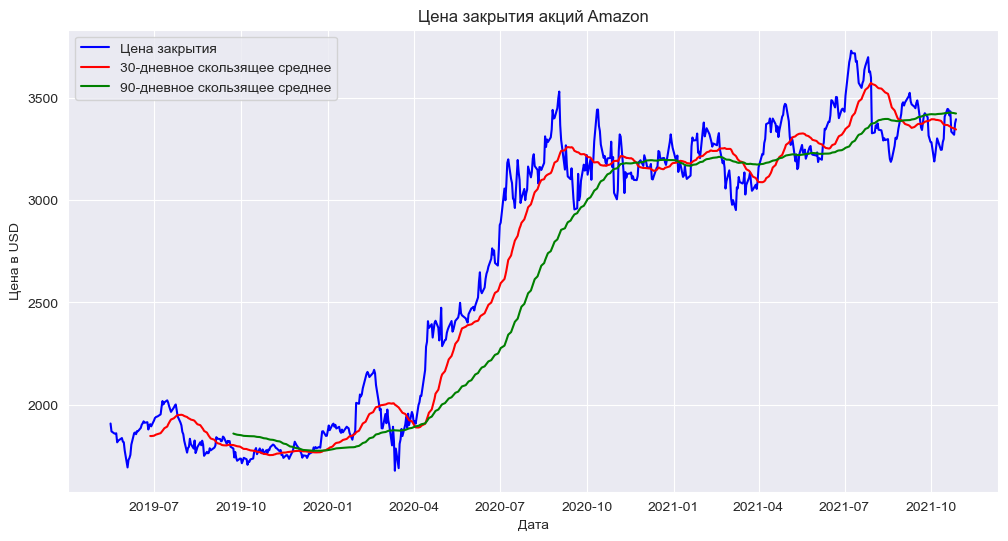

In [32]:
ohloc = amazon_df[(amazon_df['Date'] > '2019-05-15')]
ohloc = ohloc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume','Market Cap', 'vol', 'Cumulative Return']]

ohloc['Date'] = pd.to_datetime(ohloc['Date'], format='%Y-%m-%d')

ohloc.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(ohloc.index, ohloc['Close'], label='Цена закрытия', color='blue')
plt.title('Цена закрытия акций Amazon')
plt.xlabel('Дата')
plt.ylabel('Цена в USD')

short_rolling_mean = ohloc['Close'].rolling(window=30).mean()  # 30-дневное скользящее среднее
long_rolling_mean = ohloc['Close'].rolling(window=90).mean()  # 90-дневное скользящее среднее

plt.plot(ohloc.index, short_rolling_mean, label='30-дневное скользящее среднее', color='red')
plt.plot(ohloc.index, long_rolling_mean, label='90-дневное скользящее среднее', color='green')

plt.legend()

plt.show()